In [1]:
import numpy as np
from random import random, seed
import json
import pathlib

from RegLib.SamplingMethod import SamplingMethod
from RegLib.RegressionMethod import RegressionType
from RegLib.HelperFunctions import confidence_interval, create_frankie_data, create_X
from RegLib.load_save_data import *
from PROJECT_SETUP import SEED, SAVE_FIG, CHECKPOINTS_DIR

In [2]:
N = 20
noise_strength = 0.1
p = 2

x, y, z = create_frankie_data(SEED, N, noise_strength)
X = create_X(x, y, p)

In [3]:
X = create_X(x, y, n = p)
perm_index = np.random.permutation(len(z))
sampling = SamplingMethod().train_and_test(X, z, perm_index = perm_index, model_type = RegressionType.OLS)

In [5]:
run_info = {'seed': SEED,
'N': N,
'noise_strength': noise_strength,
'p': p,}

full_dict = add_more_info_to_dict(sampling.to_dict(), run_info)
full_dict

{'model_type': 'OLS',
 'model_alpha': 0.0,
 'beta': [[0.3896012611790875],
  [-0.37386131042466975],
  [-0.16485224434195886],
  [0.07746748697913156],
  [0.23397485954995578],
  [-0.18787191137852205]],
 'sampling_method': 'SamplingMethod',
 'test_r2': 0.7792926732612897,
 'test_mse': 0.021295696444406216,
 'test_bias': 0.021295696444406216,
 'seed': 2018,
 'N': 20,
 'noise_strength': 0.1,
 'p': 2}

Own inversion
[[3.87165778]
 [3.04909084]]
sgdreg from scikit
[3.82239354] [2.99584762]
theta from own gd
[[3.87165778]
 [3.04909084]]
X.shape:  (100, 2)
xi:  (1, 2)  theta:  (2, 1)  yi:  (1, 1)
gradients:  (2, 1)  theta:  (2, 1)
xi:  (1, 2)  theta:  (2, 1)  yi:  (1, 1)
gradients:  (2, 1)  theta:  (2, 1)
xi:  (1, 2)  theta:  (2, 1)  yi:  (1, 1)
gradients:  (2, 1)  theta:  (2, 1)
xi:  (1, 2)  theta:  (2, 1)  yi:  (1, 1)
gradients:  (2, 1)  theta:  (2, 1)
xi:  (1, 2)  theta:  (2, 1)  yi:  (1, 1)
gradients:  (2, 1)  theta:  (2, 1)
theta from own sdg
[[0.70455451]
 [3.06666138]]


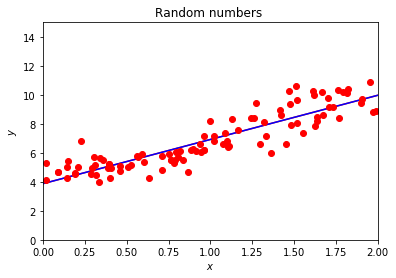

In [5]:
# Importing various packages
from math import exp, sqrt
from random import random, seed
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor

m = 100
x = 2*np.random.rand(m,1)
y = 4+3*x+np.random.randn(m,1)

X = np.c_[np.ones((m,1)), x]
theta_linreg = np.linalg.inv(X.T @ X) @ (X.T @ y)
print("Own inversion")
print(theta_linreg)
sgdreg = SGDRegressor(max_iter = 50, penalty=None, eta0=0.1)
sgdreg.fit(x,y.ravel())
print("sgdreg from scikit")
print(sgdreg.intercept_, sgdreg.coef_)


theta = np.random.randn(2,1)
eta = 0.1
Niterations = 1000


for iter in range(Niterations):
    gradients = 2.0/m*X.T @ ((X @ theta)-y)
    theta -= eta*gradients
print("theta from own gd")
print(theta)

xnew = np.array([[0],[2]])
Xnew = np.c_[np.ones((2,1)), xnew]
ypredict = Xnew.dot(theta)
ypredict2 = Xnew.dot(theta_linreg)


n_epochs = 5
t0, t1 = 5, 50
def learning_schedule(t):
    return t0/(t+t1)

theta = np.random.randn(2,1)
print("X.shape: ", X.shape)
for epoch in range(n_epochs):
    for i in range(1):
        random_index = np.random.randint(m)
        xi = X[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        print("xi: ", xi.shape, " theta: ", theta.shape, " yi: ", yi.shape)
        gradients = 2 * xi.T @ ((xi @ theta)-yi)
        eta = learning_schedule(epoch*m+i)
        theta = theta - eta*gradients
        print("gradients: ", gradients.shape, " theta: ", theta.shape)
print("theta from own sdg")
print(theta)

plt.plot(xnew, ypredict, "r-")
plt.plot(xnew, ypredict2, "b-")
plt.plot(x, y ,'ro')
plt.axis([0,2.0,0, 15.0])
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'Random numbers ')
plt.show()